# Assignment 1 - Getting and parsing texts 

In [167]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup 
import re

#extract the data 
r=requests.get("https://www.gutenberg.org/cache/epub/1934/pg1934.txt")
data=BeautifulSoup(r.content).text
type(data)

data


'The Project Gutenberg eBook of Songs of Innocence and of Experience, by William Blake\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Songs of Innocence and of Experience\r\n\r\nAuthor: William Blake\r\n\r\nRelease Date: October, 1999 [eBook #1934]\r\n[Most recently updated: December 24, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: David Price\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE AND OF EXPERIENCE ***\r\n\r\n          [Picture: Image of Blake’s original page of The Tyger]\r\n\r\n\r\n\r\n\r\n\r\n                         

In [168]:
#split strings 
split=data.split('\r\n\r\n\r\n\r\n\r\n')

# create contents element
contents=split[2]
contents

#create a list of books and list of titles - working
b=re.compile("[A-Z]+\s[A-Z]+\s[A-Z]+")
books=b.findall(contents) #book finder
books


#create a list of titles - not working -> I don't need it 
#t=re.compile("\n[A-Z][a-z]+(/s[A-Z][a-z]+)*\r")
#c=re.compile("(\r\n){2}.+(\r\n){2}")
#titles=c.findall(contents)
#titles


#check how the split looks like
contents



'CONTENTS\r\n\r\n             SONGS OF INNOCENCE\r\n\r\nIntroduction\r\nThe Shepherd\r\nThe Echoing Green\r\nThe Lamb\r\nThe Little Black Boy\r\nThe Blossom\r\nThe Chimney-Sweeper\r\nThe Little Boy Lost\r\nThe Little Boy Found\r\nLaughing Song\r\nA Cradle Song\r\nThe Divine Image\r\nHoly Thursday\r\nNight\r\nSpring\r\nNurse’s Song\r\nInfant Joy\r\nA Dream\r\nOn Another’s Sorrow\r\n\r\n             SONGS OF EXPERIENCE\r\n\r\nIntroduction\r\nEarth’s Answer\r\nThe Clod and the Pebble\r\nHoly Thursday\r\nThe Little Girl Lost\r\nThe Little Girl Found\r\nThe Chimney-Sweeper\r\nNurse’s Song\r\nThe Sick Rose\r\nThe Fly\r\nThe Angel\r\nThe Tiger\r\nMy Pretty Rose-Tree\r\nAh, Sunflower\r\nThe Lily\r\nThe Garden of Love\r\nThe Little Vagabond\r\nLondon\r\nThe Human Abstract\r\nInfant Sorrow\r\nA Poison Tree\r\nA Little Boy Lost\r\nA Little Girl Lost\r\nA Divine Image\r\nA Cradle Song\r\nTo Tirzah\r\nThe Schoolboy\r\nThe Voice of the Ancient Bard'

In [159]:
split

['The Project Gutenberg eBook of Songs of Innocence and of Experience, by William Blake\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Songs of Innocence and of Experience\r\n\r\nAuthor: William Blake\r\n\r\nRelease Date: October, 1999 [eBook #1934]\r\n[Most recently updated: December 24, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: David Price\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK SONGS OF INNOCENCE AND OF EXPERIENCE ***\r\n\r\n          [Picture: Image of Blake’s original page of The Tyger]',
 '\r\n                            SONGS OF IN

In [163]:
split[3:52]

['SONGS OF INNOCENCE',
 'INTRODUCTION\r\n\r\n\r\nPiping down the valleys wild,\r\n    Piping songs of pleasant glee,\r\nOn a cloud I saw a child,\r\n    And he laughing said to me:\r\n\r\n‘Pipe a song about a Lamb!’\r\n    So I piped with merry cheer.\r\n‘Piper, pipe that song again.’\r\n    So I piped: he wept to hear.\r\n\r\n‘Drop thy pipe, thy happy pipe;\r\n    Sing thy songs of happy cheer!’\r\nSo I sung the same again,\r\n    While he wept with joy to hear.\r\n\r\n‘Piper, sit thee down and write\r\n    In a book, that all may read.’\r\nSo he vanished from my sight;\r\n    And I plucked a hollow reed,\r\n\r\nAnd I made a rural pen,\r\n    And I stained the water clear,\r\nAnd I wrote my happy songs\r\n    Every child may joy to hear.',
 'THE SHEPHERD\r\n\r\n\r\nHow sweet is the shepherd’s sweet lot!\r\nFrom the morn to the evening he strays;\r\nHe shall follow his sheep all the day,\r\nAnd his tongue shall be fillèd with praise.\r\n\r\nFor he hears the lambs’ innocent call,\r\nAnd

In [174]:
split[4]

'INTRODUCTION\r\n\r\n\r\nPiping down the valleys wild,\r\n    Piping songs of pleasant glee,\r\nOn a cloud I saw a child,\r\n    And he laughing said to me:\r\n\r\n‘Pipe a song about a Lamb!’\r\n    So I piped with merry cheer.\r\n‘Piper, pipe that song again.’\r\n    So I piped: he wept to hear.\r\n\r\n‘Drop thy pipe, thy happy pipe;\r\n    Sing thy songs of happy cheer!’\r\nSo I sung the same again,\r\n    While he wept with joy to hear.\r\n\r\n‘Piper, sit thee down and write\r\n    In a book, that all may read.’\r\nSo he vanished from my sight;\r\n    And I plucked a hollow reed,\r\n\r\nAnd I made a rural pen,\r\n    And I stained the water clear,\r\nAnd I wrote my happy songs\r\n    Every child may joy to hear.'

In [177]:
#select part with poems
poems=split[4:52]
rows=[]

book_title="SONGS OF INNOCENCE"
for poem in poems:
    if poem==books[1]:
        book_title=poem
        poems.remove(poem)
        print(book_title)
    
    else:
        splitted_poem=poem.split("\n")
        #print (splitted_poem) #it's a list -> Can't split it anymore
        title_poem=splitted_poem[0]
        splitted_poem=splitted_poem[3:]  #remove title of poem
        #print(splitted_poem)
        
        #create list with stanza number   
        stanza=1
        count=0
        for x in splitted_poem:        
            if x == ('\r'):
                stanza+=1
                splitted_poem.remove(x)
            else:
                count+=1                
                rows.append([x, count, stanza, title_poem, book_title])                          
                
                              
         #remember to do it for 
        #elif poem== books[1]:
             #book2=poem
            #

df1=pd.DataFrame(rows, columns=["Line","line_number", "stanza_number", "poem_title","book_title"])

df1
            

SONGS OF EXPERIENCE


,Line,line_number,stanza_number,poem_title,book_title
0,"Piping down the valleys wild,\r",1,1,INTRODUCTION\r,SONGS OF INNOCENCE
1,"Piping songs of pleasant glee,\r",2,1,INTRODUCTION\r,SONGS OF INNOCENCE
2,"On a cloud I saw a child,\r",3,1,INTRODUCTION\r,SONGS OF INNOCENCE
3,And he laughing said to me:\r,4,1,INTRODUCTION\r,SONGS OF INNOCENCE
4,So I piped with merry cheer.\r,5,2,INTRODUCTION\r,SONGS OF INNOCENCE
...,...,...,...,...,...
732,Tangled roots perplex her ways;\r,7,1,THE VOICE OF THE ANCIENT BARD\r,SONGS OF EXPERIENCE
733,How many have fallen there!\r,8,1,THE VOICE OF THE ANCIENT BARD\r,SONGS OF EXPERIENCE
734,They stumble all night over bones of the dead;\r,9,1,THE VOICE OF THE ANCIENT BARD\r,SONGS OF EXPERIENCE
735,And feel—they know not what but care;\r,10,1,THE VOICE OF THE ANCIENT BARD\r,SONGS OF EXPERIENCE


2 days later.... the dataframe is ready (almost!!)
todos:
1. remove "\r" from every line -done!
2. change book 1 to book 2 -> find position of book 2




In [144]:
df1[df1.poem_title == "INTRODUCTION\r"]

,Line,line_number,stanza_number,poem_title,book_title


In [181]:
# remove \r
df1["Line"] = [line.replace("\r", "") for line in df1.Line]
df1["poem_title"]=[title.replace("\r", "") for title in df1.poem_title]

df1


,Line,line_number,stanza_number,poem_title,book_title
0,"Piping down the valleys wild,",1,1,INTRODUCTION,SONGS OF INNOCENCE
1,"Piping songs of pleasant glee,",2,1,INTRODUCTION,SONGS OF INNOCENCE
2,"On a cloud I saw a child,",3,1,INTRODUCTION,SONGS OF INNOCENCE
3,And he laughing said to me:,4,1,INTRODUCTION,SONGS OF INNOCENCE
4,So I piped with merry cheer.,5,2,INTRODUCTION,SONGS OF INNOCENCE
...,...,...,...,...,...
732,Tangled roots perplex her ways;,7,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
733,How many have fallen there!,8,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
734,They stumble all night over bones of the dead;,9,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE
735,And feel—they know not what but care;,10,1,THE VOICE OF THE ANCIENT BARD,SONGS OF EXPERIENCE


In [13]:
poems=split[3:51]

rows=[]


for poem in poems:
    if poem== books[0]:
        book1=poem
        #print(book1)        
    
    
    else: 
        splitted_poem=poem.split("\r\n")
        #print (splitted_poem) #it's a list -> Can't split it anymore
        #remove title of poem
        title_poem=splitted_poem[0]
        splitted_poem=splitted_poem[3:]
        print(splitted_poem)
        
        for x in splitted_poem:
            stanza=x.split(" \' \'")
            print (stanza)

['Piping down the valleys wild,', '    Piping songs of pleasant glee,', 'On a cloud I saw a child,', '    And he laughing said to me:', '', '‘Pipe a song about a Lamb!’', '    So I piped with merry cheer.', '‘Piper, pipe that song again.’', '    So I piped: he wept to hear.', '', '‘Drop thy pipe, thy happy pipe;', '    Sing thy songs of happy cheer!’', 'So I sung the same again,', '    While he wept with joy to hear.', '', '‘Piper, sit thee down and write', '    In a book, that all may read.’', 'So he vanished from my sight;', '    And I plucked a hollow reed,', '', 'And I made a rural pen,', '    And I stained the water clear,', 'And I wrote my happy songs', '    Every child may joy to hear.']
['Piping down the valleys wild,']
['    Piping songs of pleasant glee,']
['On a cloud I saw a child,']
['    And he laughing said to me:']
['']
['‘Pipe a song about a Lamb!’']
['    So I piped with merry cheer.']
['‘Piper, pipe that song again.’']
['    So I piped: he wept to hear.']
['']
['‘Dro

# Visualizing text data 


In [72]:
df2= pd.read_csv('innocence_experience.csv')
df2.head(5)

,book,poem,line_n,stanza_n,text
0,SONGS OF INNOCENCE,INTRODUCTION,0,0,"Piping down the valleys wild,"
1,SONGS OF INNOCENCE,INTRODUCTION,1,0,"Piping songs of pleasant glee,"
2,SONGS OF INNOCENCE,INTRODUCTION,2,0,"On a cloud I saw a child,"
3,SONGS OF INNOCENCE,INTRODUCTION,3,0,And he laughing said to me:
4,SONGS OF INNOCENCE,INTRODUCTION,4,1,‘Pipe a song about a Lamb!’


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

#for col in df.columns:
    #print(col)

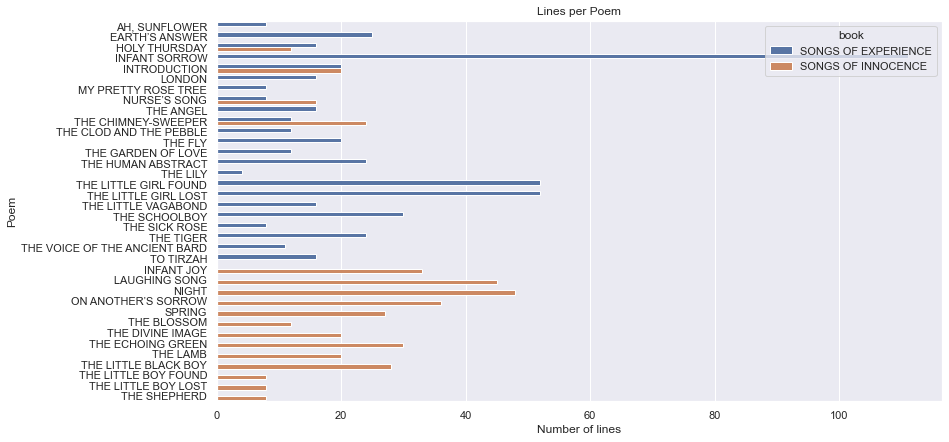

In [74]:
# Create a histogram showing the number of lines per poem 

bp = (df2
.groupby(['book',"poem"], as_index=False)
.count()
#.reset_index()
)

#can be better 
ax = sns.barplot(
    y="poem",
    x="line_n",
    hue="book",
    data=bp,
    )
ax.set(xlabel="Number of lines", ylabel="Poem")
ax.set_title('Lines per Poem')
sns.set(rc = {'figure.figsize':(13, 7)})

#plt.savefig("plots/pubs_time_bar_sns.png")




There are 3 poem titles which are present in  both of the books. 

In [75]:
#Create a document feature matrix treating each line as a document
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pprint

lines=df2.text
vectorizer = CountVectorizer(stop_words="english")
vects= vectorizer.fit_transform(lines)
dfm1=pd.DataFrame(vects.todense(),
        columns=vectorizer.get_feature_names_out())
dfm1


,abroad,ache,admired,afar,age,aged,agree,ah,air,albion,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
for p in poems:
    print ("p")
    print (p)

p
Ah, sunflower, weary of time, Who countest the steps of the sun; Seeking after that sweet golden clime Where the traveller’s journey is done; Where the Youth pined away with desire, And the pale virgin shrouded in snow, Arise from their graves, and aspire Where my Sunflower wishes to go!
p
Earth raised up her head From the darkness dread and drear, Her light fled, Stony, dread, And her locks covered with grey despair. ‘Prisoned on watery shore, Starry jealousy does keep my den Cold and hoar; Weeping o’er, I hear the father of the ancient men. ‘Selfish father of men! Cruel, jealous, selfish fear! Can delight, Chained in night, The virgins of youth and morning bear. ‘Does spring hide its joy, When buds and blossoms grow? Does the sower Sow by night, Or the ploughman in darkness plough? ‘Break this heavy chain, That does freeze my bones around! Selfish, vain, Eternal bane, That free love with bondage bound.’
p
Is this a holy thing to see In a rich and fruitful land,— Babes reduced to mi

In [63]:
#Create a separate document feature matrix treating each poem as a document
data = (df2
       .groupby(['book', 'poem'])['text'] 
       .aggregate(lambda x: ' '.join(x))
       .reset_index()
       )

poems=data.text

vectorizer = CountVectorizer(stop_words="english")
vects= vectorizer.fit_transform(poems)
dfm2=pd.DataFrame(vects.todense(),
        columns=vectorizer.get_feature_names_out())
dfm2

,abroad,ache,admired,afar,age,aged,agree,ah,air,albion,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,2,0,1,0,0,1,...,3,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#get poem titles in the document feature matrix 
poem_titles=[]
poem_book=[]
for p in (bp.poem):
    poem_titles.append(p)
    
for b in (bp.book):    
    poem_book.append(b)

    

print(len(poem_book))

idx=0
#dfm2.insert(loc=idx, column="titles", value=poem_titles)
dfm2.insert(loc=idx, column="poem_book", value=poem_book)


dfm2
    

40


,poem_book,abroad,ache,admired,afar,age,aged,agree,ah,air,...,wrath,wren,writ,write,wrote,year,young,youth,youthful,zeal
0,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SONGS OF EXPERIENCE,0,0,1,1,2,0,1,0,0,...,3,0,0,0,0,0,0,1,1,1
4,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,SONGS OF EXPERIENCE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Using one of these document feature matrices, create a plot that compares the frequency of words in each book. 
# Comment on the features that are more or less frequent in one book than another.

col_names=[]
for col in dfm2.columns:
    
    col_names.append(col)


data=(dfm2
    .groupby("poem_book")
    .sum())
    #.sort_values()
    
    
#data
#data.sort_values(by=col_names,axis=1, ascending=False)
#max_elements = data.max(axis=1)
print(data)





                     abroad  ache  admired  afar  age  aged  agree  ah  air  \
poem_book                                                                     
SONGS OF EXPERIENCE       0     1        1     1    2     0      1   2    0   
SONGS OF INNOCENCE        1     0        0     0    0     1      0   0    1   

                     albion  ...  wrath  wren  writ  write  wrote  year  \
poem_book                    ...                                          
SONGS OF EXPERIENCE       1  ...      3     0     1      0      0     1   
SONGS OF INNOCENCE        0  ...      1     1     0      1      1     3   

                     young  youth  youthful  zeal  
poem_book                                          
SONGS OF EXPERIENCE      0      6         3     1  
SONGS OF INNOCENCE       1      1         0     0  

[2 rows x 1093 columns]


In [105]:
data_sorted=(data
 .stack()
 .reset_index()
 .sort_values(['poem_book', 0], ascending=False)
 .groupby("poem_book")
 .head(10)
)
data_sorted.rename(columns={0: "count", "level_1":"word"}, inplace=True)



In [104]:
data_sorted

,poem_book,level_1,0
2031,SONGS OF INNOCENCE,thee,25
1636,SONGS OF INNOCENCE,little,21
2012,SONGS OF INNOCENCE,sweet,19
1582,SONGS OF INNOCENCE,joy,17
1512,SONGS OF INNOCENCE,happy,13
1631,SONGS OF INNOCENCE,like,13
1247,SONGS OF INNOCENCE,child,12
1488,SONGS OF INNOCENCE,green,12
1598,SONGS OF INNOCENCE,lamb,12
2050,SONGS OF INNOCENCE,thy,12


<AxesSubplot:xlabel='word', ylabel='count'>

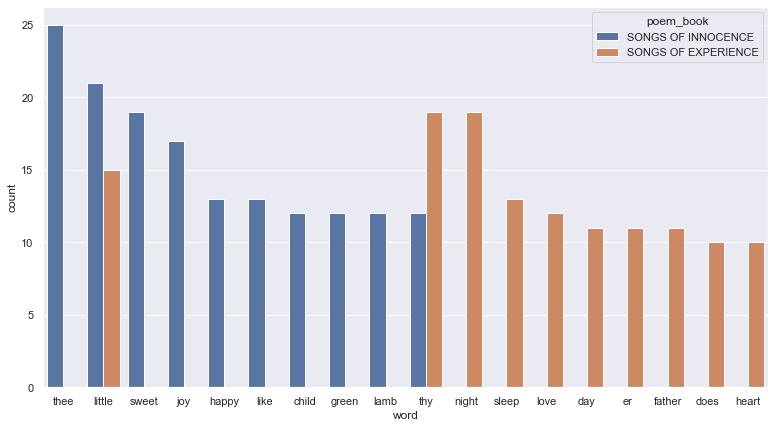

In [107]:
#c=pd.DataFrame(rows, columns=[col_names])
#rows=[]

sns.barplot(data=data_sorted, x="word", y="count", hue="poem_book" )
#plt.title(f'Word count of {poem_book}')
#plt.xlabel('Count')
#plt.ylabel('Terms')
#plt.show()
#plt.clf()



In the book "The songs of innocence" the most common words seem to refer to positive emotions (happy, joy, sweet). There is also the word "child". In general, this finding is consistent with the title of the book. The same can be said for the book "The song of experience". Indeed, the words "night", "sleep", "father", make us think about the end of a day, which in a methaphorical sense, can be understood as a later stage of life. 